# Data Science in Design - Assignments 2
## Disease in India


**Describe:** 

>The data about disease in India is a huge data in xml files with images and all txt files which are combined by many reports and books. I chose one of the book ( Cholera in India, 1862 to 1881) to analysis as my computer is not good enough to analyse all of them, and its file folder number is “74461102”. test



**Catalogue:** 

>- The frenquency of the districts' names in book (Cholera in India)
- The network of “Cholera” was described
- Wordcloud of the sentence about "Cholera"
- Death caused by Cholera between Europeans and Natives

 ## 1. The frenquency of the districts' names (Cholera in India)

What we got is all the xml files and imgae of the history files.
So, firstly, I chose part of the files to globe.

In [31]:
import glob
import pandas as pd 
import numpy as np
import xml.etree.cElementTree as ET 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

alfiles = glob.glob(r'***/**/*.xml') # globe all the data about Cholera in India

#Tring to locate the path to every words (as the data is all in xml file)
#From the book, it can be seen that have many district. So I choose to list all the districts in the table.

list_DIS=[] # create a new list for districts

for firstfile in alfiles: # there is a clear table in the first xml file include different districts
    if firstfile =='74461102-Cholera in India, 1862 to 1881/alto/74442941.34.xml':
        tree=ET.ElementTree(file=firstfile) # load xmls by the element tree
        root=tree.getroot()
        
        for distirct in root.iter(tag='{http://www.loc.gov/standards/alto/v3/alto.xsd}String'): 
            vpos=distirct.attrib['VPOS']
            hpos=distirct.attrib['HPOS'] # use the position in the image page to locate all the districts 
            if 935<=int(vpos)<3287 and 550<int(hpos)<724:
                DIS = distirct.attrib['CONTENT']
                list_DIS.append(DIS) # add to the list
list_DIS

['Burdwan',
 'Bankuru',
 'Birbhoom',
 'Midnapore',
 'Hooghli',
 'Serampur',
 'Howrah',
 '24-Pergunnahs',
 'Nuddea',
 'Jessore',
 'Moorshedabad',
 'Dinagepur',
 'Maldah',
 'Rajshahye',
 'Eungpore',
 'Bogra',
 'Pubna',
 'Darjeeling',
 'Julpaiguri',
 'Dacca',
 'Furridpore',
 'Backergunge',
 'Mymensingh',
 'Chittagong',
 'Noakholly',
 'Tipperah',
 'Patna',
 'Gya',
 'Shahabad',
 'Tirhoot',
 'Sarun',
 'Chumparun',
 'Monghyr',
 'Bhagulpore',
 'Purneah',
 'Rajmahal',
 'Sonthal',
 'Pergunnahs',
 'Cuttack',
 'Pooree',
 'Balasoro',
 'Hazaribagh',
 'Lobardugga',
 'Sinebhum']

Define a method to calculate the number of the districts

In [32]:
def counter_district(district_name): # define a function to find district numbers
    import glob
    alfiles = glob.glob(r'***/**/*.xml')
    import xml.etree.cElementTree as ET

    counter = 0
    for ef in alfiles:
        tree=ET.ElementTree(file = ef)
        for word in tree.iter(tag='{http://www.loc.gov/standards/alto/v3/alto.xsd}String'):
            if word.attrib['CONTENT'] == district_name:
                counter = counter+1
    return(counter)

#Calculate the number of the districts' name in the book and make them in a another newlist
list_Times=[] # calculate the frenquency times of the districts
for every_dis in list_DIS:
        list_Times.append(counter_district(every_dis))
list_Times

[61,
 1,
 1,
 19,
 20,
 10,
 49,
 35,
 40,
 57,
 9,
 6,
 49,
 52,
 1,
 41,
 46,
 14,
 36,
 83,
 17,
 31,
 26,
 65,
 12,
 52,
 85,
 63,
 44,
 7,
 24,
 32,
 62,
 41,
 26,
 12,
 34,
 10,
 52,
 6,
 1,
 50,
 3,
 1]

Merge in a dataframe

In [33]:
df= {'Districts':list_DIS,'Times':list_Times}
data_dn= pd.DataFrame(data=df)
data_dn.head()

Districts  Times
0    Burdwan     61
1    Bankuru      1
2   Birbhoom      1
3  Midnapore     19
4    Hooghli     20

Visualization by barplot

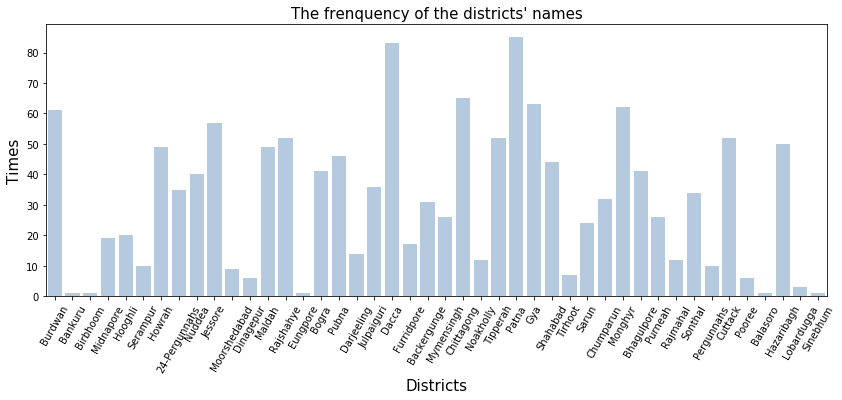

In [34]:
sns.set_color_codes("pastel")
ax = plt.subplots(figsize=(14, 5))
ax = sns.barplot(x='Districts', y='Times', 
                 data=data_dn, color="b", saturation=0.5,)
plt.xticks(rotation=60)
plt.xlabel('Districts',fontsize= 15)
plt.ylabel('Times',fontsize= 15)
ax.set_title("The frenquency of the districts' names",fontsize= 15)
plt.show()

 ## 3. Wordcloud of the sentence about "Cholera"


I am trying to analysis the word frquency about "Cholera".

In [39]:
import nltk #use the function to find the sentence include the word "Cholera"
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

f=open('74461102.txt').read()
sentences=sent_tokenize(f)
my_sentence=[sent for sent in sentences if 'Cholera' in word_tokenize(sent)] 
key_contant=' '.join(my_sentence)
key_contant

[nltk_data] Downloading package punkt to /Users/wuqbin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'Of the 367 admissions there\nCholera in Bengal Province during the year 1862. 348 "               11 "              4 Tipperah "              446 "                2 "              1  Dacca "             490 "                14 "              1 Midnapur   ... "              524 "                2 "              0 Cuttack   ... "             348 "                4 "              3 Hazaribagh    ...        "             392 "                34 "              15 Monghyr   ... "             380 "                72 "              39 Bhagalpur "             375 "                39 "              10  Purniah  ... "              478 "                215 "              81 Gya "              435  "                36 "              9 Patna   .... "              436 "               71 "              19 Digah  ... "               92 "                3 "               1 ?rrah "              486 "               26 "              10 Mozaffarpur ... "             423 "                80  "             

Visualization by the wordcloud

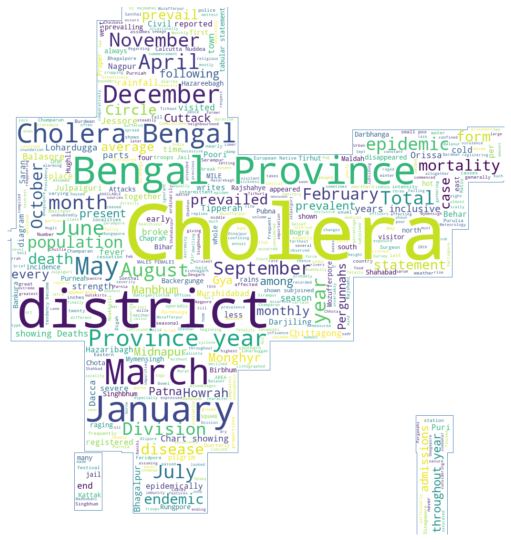

In [40]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

fig = plt.figure(figsize=(12,10), dpi= 70)

India_mask = np.array(Image.open('India-Map.png'))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=2000, mask=India_mask ,
               stopwords=stopwords, contour_width=1, contour_color='steelblue')

wc.generate(key_contant)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.show()

 ## 4. Death caused by Cholera between Europeans and Natives


After analysing the whole book, I can see the whole book described the diseases happened in Bengal province. And I found the table in the end of the book is the summary of what whole data. So I wanted to recover the sheet.

In [77]:
list_year=[]          # get the data through elementtree and put into different lists
list_euro_strenth=[]
list_euro_death=[]
list_native_strenth=[]
list_native_death=[]

for lastfile in alfiles:
    if lastfile =='74461102-Cholera in India, 1862 to 1881/alto/74443224.34.xml':
        tree=ET.ElementTree(file=lastfile)
        root=tree.getroot()
        for n in root.iter(tag='{http://www.loc.gov/standards/alto/v3/alto.xsd}String'):
            if 933<=int(n.attrib['VPOS'])<=1400 and 400<=int(n.attrib['HPOS'])<=420:
                y = n.attrib['CONTENT']
                list_year.append(y)
            if 935<=int(n.attrib['VPOS'])<=1400 and 660<=int(n.attrib['HPOS'])<=670:
                e_str = n.attrib['CONTENT']
                list_euro_strenth.append(e_str)
            if 935<=int(n.attrib['VPOS'])<=1400 and 880<=int(n.attrib['HPOS'])<=930:
                e_dea = n.attrib['CONTENT']
                list_euro_death.append(e_dea)
            if 935<=int(n.attrib['VPOS'])<=1400 and 1000<=int(n.attrib['HPOS'])<=1100:
                n_str = n.attrib['CONTENT']
                list_native_strenth.append(n_str)
            if 930<=int(n.attrib['VPOS'])<=1400 and 1230<=int(n.attrib['HPOS'])<=1270:
                n_dea = n.attrib['CONTENT']
                list_native_death.append(n_dea)

# len(list_year)
# len(list_euro_strenth)
# len(list_euro_death)
# len(list_native_strenth)
# len(list_native_death)

clean the data


In [78]:
list_euro_death.insert(13,'0')
list_euro_death[11]='2'
list_year[1]='1863'


def delete_comma(s):
    return ''.join(s.split(','))

df_E= {'Years':list_year,'Nationality':'European',
      'Population':list_euro_strenth,
      'Deaths':list_euro_death}
data_E_death= pd.DataFrame(data=df_E)
data_E_death['Population'] = data_E_death['Population'].apply(delete_comma)


df_I= {'Years':list_year,'Nationality':'Indian',
      'Population':list_native_strenth,
      'Deaths':list_native_death}
data_I_death= pd.DataFrame(data=df_I)
data_I_death['Population'] = data_I_death['Population'].apply(delete_comma)


data_E_death['Population']=data_E_death['Population'].astype(int)
data_E_death['Deaths']=data_E_death['Deaths'].astype(int)

data_I_death['Population']=data_I_death['Population'].astype(int)
data_I_death['Deaths']=data_I_death['Deaths'].astype(int)

# data_E_death
# data_I_death

Add a colum of the death rate which caculated by the data and merge them.


In [80]:
e3=data_E_death['Population']
e4=data_E_death['Deaths']

data_E_death['Death rate']=e4/e3

        
i3=data_I_death['Population']
i4=data_I_death['Deaths']

data_I_death['Death rate']=i4/i3

# data_E_death
# data_I_death
data_both= data_E_death.append(data_I_death)
data_both.head()

Years Nationality  Population  Deaths  Death rate
0  1862    European        4803      27    0.005621
1  1863    European        4112      16    0.003891
2  1864    European        4808      10    0.002080
3  1865    European        6050      17    0.002810
4  1866    European        4381      18    0.004109

Visualization them by relplot

<Figure size 800x500 with 0 Axes>

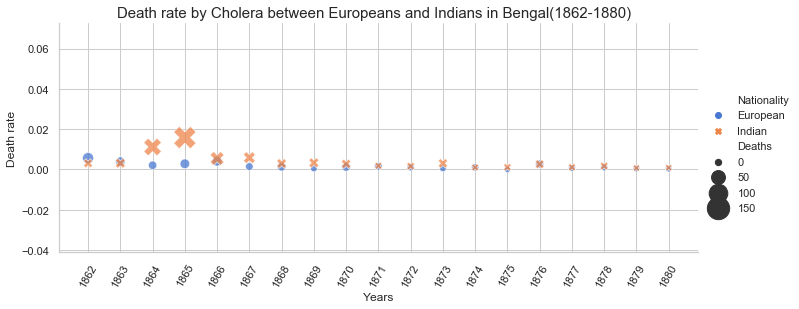

In [83]:
sns.set(style="whitegrid")

fig = plt.figure(figsize=(8,5), dpi= 100)

sns.relplot(x="Years", y="Death rate", hue="Nationality",
            style='Nationality',
            size="Deaths",sizes=(40, 500),size_order=None,
            alpha=0.75, palette="muted",
            legend='brief',
            dashes='34',
            height=4, aspect=2.5,data=data_both)

plt.xticks(rotation=60)
plt.title("Death rate by Cholera between Europeans and Indians in Bengal(1862-1880)  ",fontsize= 15)
plt.show()

**Reflection:**

At the beginning, the huge textual data seems like a big problem for me. However, luckily, we get the catalog of the textual data, and we can find some information to follow through the image. We use the xml file function in python to get the whole text from the history files, and compared with the image to find some conclusion. 

What I chose is one of the disease “Cholera” which been described and record in a book, and try to analysis. Initially, I found some clear tables in the first part, and try to see the frequency of the “districts” in India. I discovered that many of the district names has been written by many times in the book, which means it maybe talked a lot and have some important role in the disease spreading. The affection and population also been showed in some table obviously as well. 

Then I chose to focus on the description of the disease and found some words as “endemic” is highly frequency follow the name. Also, there is a result I did not noticed that this book is based on the record in Bengal province not exactly in the India today, which is revealed in the process of visualising by word cloud. 

From the observing the whole data, its easy to find clear table like summary in the end of the book. But, the data is not that clean if we want to recover the table. Additionally, you should do something more to make the data more clear and tell the difference. As I figured out in my homework, I found that there is some trend from the affection group between the European troops and local people, and changed by the time.

**Hypothesise：**

Although what I dealed with is a small part of the textual data, I can see that the death from the disease has some link to the districts, and different  nationality. Also, this might leading to the way that British government rule the whole country. For example, different lifestyle may cause the difference people would be infected.

**Futher research：**

During the research process, I can feel that it is struggling to only analysis the textual without any figures. However, if we can gather core imformation of each book(like some representitive tables) and connected together, maybe we can find some significant result to show. What I imagined is a kind of heatmap in the history India map show the data of people infected and died with an interaction with time’s going. But, actually, the districts in the book are not only differernt from the map we used today but also we may lack of useful skills to analysis the data.So in summary, we should dive more into the data, find some clear tables which can represent the whole book content and then discovered more varables to define. Improving the skills with python is important for us to find more relationship and hope tutor can give us more advice to us.